#DBScan

André Filipe

In [2]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Essa porção do código baixa diretamente a base de dados para o cache do usuário
# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)
df = pd.read_csv(path+'/diamonds.csv')

Path to dataset files: C:\Users\filip\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [4]:
features = df[['depth', 'table', 'price']]


In [5]:
scaler = StandardScaler()
features_escaladas = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.4, min_samples=5) # eps foi definido usando código do fim do notebook

dbscan.fit(features_escaladas)

df['cluster'] = dbscan.labels_

cluster
 0    53923
-1       17
Name: count, dtype: int64


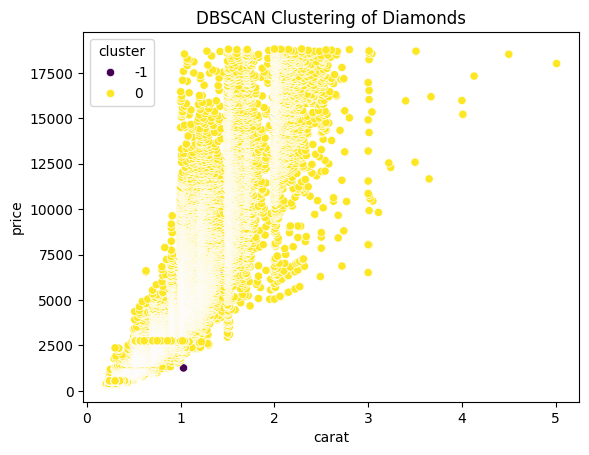

In [13]:
# Check unique clusters (-1 indicates noise)
print(df['cluster'].value_counts())

# Visualize the clusters (example: using carat and price)
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='carat', y='price', hue='cluster', palette='viridis')
plt.title('DBSCAN Clustering of Diamonds')
plt.show()

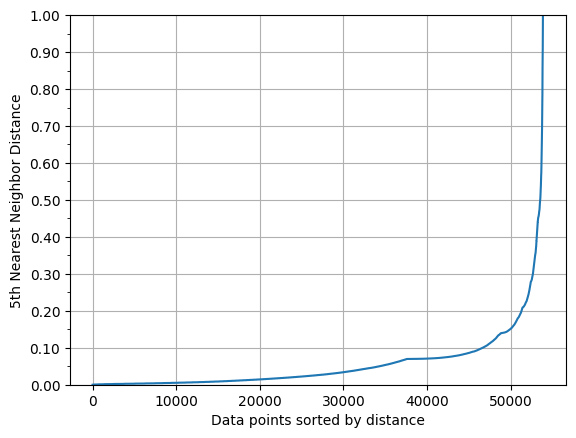

In [8]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.ticker as ticker

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features_escaladas)
distances, indices = neighbors_fit.kneighbors(features_escaladas)

# Plot the distances
distances = np.sort(distances[:, 4])  # Use the 5th nearest neighbor
plt.plot(distances)
plt.xlabel('Data points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')

# Focus y-axis on the range [0, 1]
plt.ylim(0, 1)

# Add more grid lines with custom ticks
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.grid(True)
plt.show()

In [ ]:
# Usar o silhuete score
# Verificar proximidade e variação dos clusters
# 
# from sklearn.metrics import silhouette_score
# 
# best_eps = None
# best_score = -1
# for eps in np.arange(0.1, 1.5, 0.1):
#     dbscan = DBSCAN(eps=eps, min_samples=5).fit(features_escaladas)
#     labels = dbscan.labels_
#     if len(set(labels)) > 1:  # Silhouette is only valid with more than one cluster
#         score = silhouette_score(features_escaladas, labels)
#         if score > best_score:
#             best_score = score
#             best_eps = eps
# 
# print(f"Best eps: {best_eps}, Silhouette Score: {best_score}")

Best eps: 1.4000000000000001, Silhouette Score: 0.7893738062505966
